任务3内容：完成第6章的学习，代码实现的过程上传到GitHub

[第6章案例文件地址](https://github.com/wesm/pydata-book)

DDL：20190813 8:00am

In [7]:
import pandas as pd
import numpy as np

## 6.1 读写文本格式的数据

pandas中的解析函数：用于将表格型数据读取为DF(DataFarme)对象的函数

<img src = './pandas中的解析函数.png' width=600>

**将csv文件读取成DF对象**

pd.read_csv()

In [5]:
# windows中的type命令将文件的原始内容打印到屏幕上
!type examples\ex1.csv
# 绝对路径访问
# !type 'C:\Users\Burette\pydata-book-master\ch06\ex1.csv'

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [9]:
# 指定分隔符
pd.read_csv('examples\ex1.csv', sep=',') 

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [10]:
!type examples\ex2.csv # 无列名

1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [11]:
# 处理无列名情况：忽略，或指定列名
pd.read_csv('examples\ex2.csv', header=None) # 忽略列名

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [18]:
pd.read_csv('examples\ex2.csv', names=['a','b','c','d','message']) # 指定列名

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [19]:
names = ['a','b','c','d','message']
pd.read_csv('examples\ex2.csv', names=names, index_col='message') # 把某一列以及值设为行索引
# Column to use as the row labels of the DataFrame. 
# you might consider index_col=False to force pandas to not use the first column as the index (row names)

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [21]:
!type examples\csv_mindex.csv

key1,key2,value1,value2
one,a,1,2
one,b,3,4
one,c,5,6
one,d,7,8
two,a,9,10
two,b,11,12
two,c,13,14
two,d,15,16


In [22]:
# 将多个列做成（行）层次化索引
pd.read_csv('examples\csv_mindex.csv', index_col=['key1', 'key2'])

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [27]:
# 处理分隔符不规整的情况 \s+
list(open('examples/ex3.txt'))

['            A         B         C\n',
 'aaa -0.264438 -1.026059 -0.619500\n',
 'bbb  0.927272  0.302904 -0.032399\n',
 'ccc -0.264273 -0.386314 -0.217601\n',
 'ddd -0.871858 -0.348382  1.100491\n']

In [30]:
pd.read_table('examples/ex3.txt') # 直接读取DF很乱

,A B C
0,aaa -0.264438 -1.026059 -0.619500
1,bbb 0.927272 0.302904 -0.032399
2,ccc -0.264273 -0.386314 -0.217601
3,ddd -0.871858 -0.348382 1.100491


In [29]:
result = pd.read_table('examples/ex3.txt', sep='\s+') # 使用正则表达式作为分隔符：\s+
result

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [32]:
!type examples\ex4.csv

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [33]:
# 跳过某些行
pd.read_csv('examples/ex4.csv', skiprows=[0,2,3]) # 跳过1文件的第1，3，4行

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [34]:
test = pd.read_csv('examples/ex4.csv', skiprows=[0,2,3], index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [37]:
test.index.names

FrozenList(['key1', 'key2'])

In [38]:
!type examples\ex5.csv

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo


In [39]:
result = pd.read_csv('examples/ex5.csv')
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [41]:
# 判断是否为缺失值
# 如果为NULL可全部换成NAN
pd.isnull(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


In [43]:
# 直接判断NULL为缺失值
# na_values=['NULL']
result = pd.read_csv('examples/ex5.csv', na_values=['NULL']) 
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [44]:
# 字典的各列采用不同的NA标记值
sentinels = {'message': ['foo', 'NA'], 'something': ['two']}
pd.read_csv('examples/ex5.csv', na_values=sentinels)

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


read_table和read_csv函数的参数

<img src = 'read_table和read_csv函数的参数.png' width=500>

### 6.1.1 逐块读取文本文件

In [45]:
# 设置pandas显示得紧凑些
pd.options.display.max_rows = 10

In [46]:
result = pd.read_csv('examples/ex6.csv')
result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


In [47]:
# 只读取几行 nrows=?
pd.read_csv('examples/ex6.csv', nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


In [55]:
# 逐块读取 chunksize=?
chunker = pd.read_csv('examples/ex6.csv', chunksize=1000)
chunker

以上代码返回了**TextParser**对象，使得操作可以根据chunksize对文件进行**逐块迭代**

In [56]:
# 将值计数聚合到key 列中
tot = pd.Series([])
for piece in chunker:
    tot = tot.add(piece['key'].value_counts(), fill_value=0)

tot = tot.sort_values(ascending=False)

In [70]:
tot[:10]

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
dtype: float64

### 6.1.2 将数据写出到文本格式

In [71]:
data = pd.read_csv('examples/ex5.csv')
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [74]:
# 将数据输出为分隔符格式的文本 to_csv
data.to_csv('output_file/out.csv') # 默认分隔符为,
# 可在output_file 文件夹的目录下看到out.csv

In [75]:
!type output_file\out.csv

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo


In [77]:
# 使用其他分隔符
# sys.stdout的形式就是print的一种默认输出格式，等于print "%VALUE%"
import sys
data.to_csv(sys.stdout, sep='|') # 制表符

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


In [78]:
# 缺失值在输出结果中会被表示为空字符串
# 在输出结果中，标记缺失值
data.to_csv(sys.stdout, na_rep='NULL')

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


In [79]:
# 默认输出行列标签
# 可禁用，则输出的结果不带行列标签
data.to_csv(sys.stdout, index=False, header=False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


In [80]:
# 只输出部分列的数据
data.to_csv(sys.stdout, index=False, columns=['a','b','c'])

a,b,c
1,2,3.0
5,6,
9,10,11.0


In [81]:
# Series to csv
dates = pd.date_range('1/1/2019', periods=10)
dates

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10'],
              dtype='datetime64[ns]', freq='D')

In [86]:
ts = pd.Series(np.arange(1,11), index=dates)

In [87]:
ts.to_csv('output_file/tseries.csv')

In [88]:
!type output_file\tseries.csv

2019-01-01,1
2019-01-02,2
2019-01-03,3
2019-01-04,4
2019-01-05,5
2019-01-06,6
2019-01-07,7
2019-01-08,8
2019-01-09,9
2019-01-10,10


### 6.1.3 处理分隔符格式

如何处理含畸形行的文件

In [89]:
!type examples\ex7.csv

"a","b","c"
"1","2","3"
"1","2","3"


In [93]:
pd.read_table('examples/ex7.csv') # 读取结果凌乱

,"a,""b"",""c"""
0,"1,""2"",""3"""
1,"1,""2"",""3"""


**csv.reader()**

In [156]:
# 单字符分隔符文件，可直接使用Python内置的csv模块
import csv
f = open('examples/ex7.csv')

In [110]:
# 行处理
reader = csv.reader(f) 
for line in reader:
    print(line)

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3']


In [101]:
?csv.reader()

**处理完整流程**

In [151]:
with open('examples/ex7.csv') as f:
    lines = list(csv.reader(f))

print(lines)

[['a', 'b', 'c'], ['1', '2', '3'], ['1', '2', '3']]


In [152]:
# 设置标题行，数据行
header, values = lines[0], lines[1:]

In [153]:
# 创建数据列的字典
data_dict = {h: v for h, v in zip(header, zip(*values))} 
data_dict

# 还可以写成
# data_dict = dict(zip(header, zip(*values)))

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

以下是一些test，关于：

1. zip, zip(*)
2. list, dict之间的转换

<font color='blue'>test开始</font>

In [128]:
?zip()

In [129]:
lines[1:]

[['1', '2', '3'], ['1', '2', '3']]

In [137]:
lines[0]

['a', 'b', 'c']

In [134]:
values

[['1', '2', '3'], ['1', '2', '3']]

In [136]:
zip(*values) # zip类似于压缩，zip(*) 可理解为解压

In [139]:
he = ['a', 'b', 'c']
ha = [['1', '2', '3'], ['1', '2', '3']]

In [141]:
li1 = list(zip(*ha))

[('1', '1'), ('2', '2'), ('3', '3')]

In [145]:
li2 = list(zip(he, zip(*ha)))

In [146]:
dict(li2)

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

<font color='blue'>test结束</font>

定义csv.Dialect的子类可定义出新的csv分隔规则，子类包括：

<img src = 'CSV语支选项.png' width = 500>

In [157]:
class my_dialect(csv.Dialect):
    lineterminator = '\n'
    delimiter = ';'
    quotechar = '"'
    quoting = csv.QUOTE_MINIMAL
reader = csv.reader(f, dialect=my_dialect)

In [158]:
# 不定义子类也可以指定csv.Dialect子类的形式
reader = csv.reader(f, delimiter='|')

对于<font color='red'>使用复杂分隔符或多字符分隔符</font>的文件，csv模块无法进行准确的分隔。

应使用<font color='red'>字符串的split方法</font>或<font color='red'>正则表达式方法re.split</font>进行拆分和整理

### 6.1.4 JSON数据

**JSON(JavaScript Object Notation)**，是一种通过HTTP请求在Web浏览器和其他应用程序之间发送数据的标准格式之一。

**特点**：
* 数据格式灵活
* 非常接近于有效的Python代码

**JSON格式与Python形式，pandas形式的各种转换**
* **json.loads()** 将JSON字符串转换成Python形式
* **json.dumps()** 将Python对象转换成JSON格式
* **pandas.read_json** 将特别格式的JSON数据集转换成Series或DataFrame
* **to_json** 将数据从pandas输出到JSON

空值：NULL

In [162]:
# json格式数据
obj = """
{"name": "Wes",
 "places_lived": ["United States", "Spain", "Germany"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
              {"name": "Katie", "age": 38,
               "pets": ["Sixes", "Stache", "Cisco"]}]
}
"""

In [163]:
import json

In [165]:
# json.loads() 将JSON字符串转换成Python形式
result = json.loads(obj)
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

In [166]:
# json.dumps() 将Python对象转换成JSON格式
asjson = json.dumps(result)

In [169]:
# 将JSON对象转换成DataFrame
siblings = pd.DataFrame(result['siblings'], columns=['name','age'])
siblings

,name,age
0,Scott,30
1,Katie,38


In [170]:
!type examples\example.json

[{"a": 1, "b": 2, "c": 3},
 {"a": 4, "b": 5, "c": 6},
 {"a": 7, "b": 8, "c": 9}]


In [172]:
# pandas.read_json 将特别格式的JSON数据集转换成Series或DataFrame
data = pd.read_json('examples/example.json')
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [173]:
# pandas输出到JSON
print(data.to_json()) # 默认orient='table'

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}


In [175]:
print(data.to_json(orient='records'))

[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]


In [174]:
?data.to_json()

### 6.1.5 XML和HTML：Web信息收集

常用的处理XML和HTML的库：
* lxml
* Beautiful Soup
* html5lib

pandas内置的read_html功能，可以使用lxml和Beautiful Soup自动将HTML文件中的表格解析为DF对象

In [176]:
tables = pd.read_html('examples/fdic_failed_bank_list.html')

In [177]:
len(tables) # 查询html文件中表格的个数

1

In [189]:
failures = tables[0] # 取网页的第一个表，这里只有一个表

In [190]:
failures.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"


In [198]:
close_timestamps = pd.to_datetime(failures['Closing Date'])
close_timestamps.dt.year.value_counts()

2010    157
2009    140
2011     92
2012     51
2008     25
       ... 
2004      4
2001      4
2007      3
2003      3
2000      2
Name: Closing Date, Length: 15, dtype: int64

In [214]:
import matplotlib.pyplot as plt
%matplotlib inline

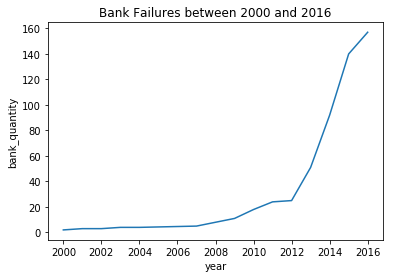

In [218]:
plt.figure(figsize=(6, 4))
x = close_timestamps.dt.year.unique()
y = close_timestamps.dt.year.value_counts()
plt.xlabel('year')
plt.ylabel('bank_quantity')
plt.title("Bank Failures between 2000 and 2016")
plt.plot(x,y)
plt.show()

### 6.1.6 利用lxml.objectify解析XML

XML和HTML的结构很相似，但XML更通用

In [219]:
# 调用xlml.objectify
from lxml import objectify

In [ ]:
# 使用xlml.objectify解析XML文件
path = 'datasets/mta_perf/Performance_MNR.xml'
parsed = objectify.parse(open(path))
# 通过getroot得到该XML文件的根节点
root = parsed.getroot()